# Design of Experiments

In [2]:
!pip3 install pydoe2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thursday Sept 19 10:05:45 2024

Developed by: Elena Raponi, Kirill Antonov & Ivan Olarte-Rodriguez (LIACS - Universiteit Leiden)

"""

# The import should work fine if you have followed the Installation Guide provided on our Moodle page.
# If the first line throws an error, this means that you will have to install the pyDOE2 package.
# Go to your Anaconda Prompt and type \"conda install -c conda-forge pydoe2\" to install it. That should solve it.
import pyDOE2
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.qmc import Sobol
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Full factorial design

[[0. 0.]
 [1. 0.]
 [2. 0.]
 [0. 1.]
 [1. 1.]
 [2. 1.]
 [0. 2.]
 [1. 2.]
 [2. 2.]]


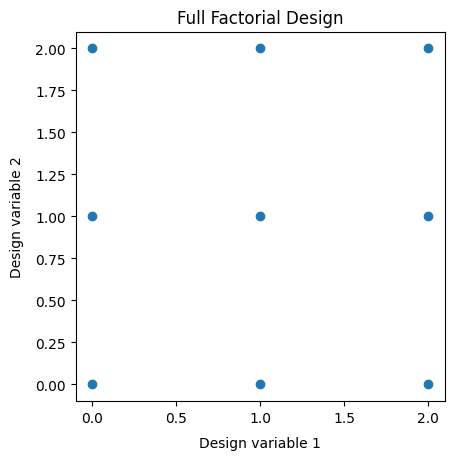

In [4]:
# ------ generate samples for 3-level full factorial for 2 design variables.
# ---- inputs
"""
Input list to fullfact function:
  Each number in the input_list gives the level for that dimension.
  i.e., [L1,L2]  means first dimension has L1 levels and the second L2.
"""
input_list = [3, 3]
DoE_FullFact = pyDOE2.fullfact(input_list)
col = [0,0,0]  # color of the lables (RGB color scheme)
print(DoE_FullFact)
# ---- plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(DoE_FullFact[:,0],DoE_FullFact[:,1])
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('Full Factorial Design', fontsize = 12)
plt.axis('square')
plt.show()

## Exercise 1a: Generate a generic (variable L) full factorial design (`fullfact`) function in pyDOE2

The `fullfact` function in pyDOE2 is flexible and allows one to create diferent levels for different direction. Following the previous example, generate and plot a full factorial sample for 3 design variables, and 2,4,3 levels for each variable, respectively.

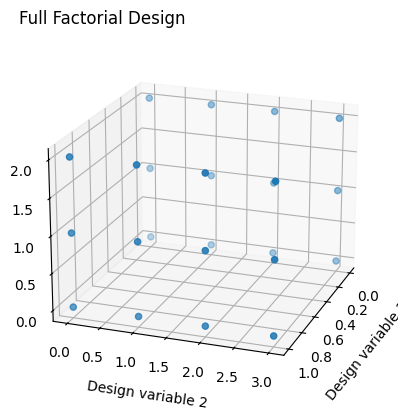

[[-1. -1.  1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [ 1.  1.  1.]
 [ 1.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1.  1.]
 [-1. -1. -1.]]


In [5]:
## ------ generate samples for 3 design variables and 2,4,3  levels.

# ---- inputs
##### ---------------TODO: Enter your code here implementing the full factorial design:
input_L_list = [2, 4, 3]
col = [0, 0, 0]
fullfact = pyDOE2.fullfact(input_L_list)
##### --------------- End of code Input

# ---- plot
# ------------ TODO: Enter your code here:
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(fullfact[:, 0], fullfact[:, 1], fullfact[:,2])
ax1.view_init(elev=20, azim=20)
# ------------ End of code input

# -- labels
ax1.set_xlabel('Design variable 1', color=col, labelpad=8)
ax1.set_ylabel('Design variable 2',color=col, labelpad=8)
ax1.set_zlabel('Design variable 3', color=col, labelpad=8, rotation=90)
plt.title('Full Factorial Design', loc='left', fontsize = 12) 
plt.show()

m = pyDOE2.fracfact('a b ab')
m = pyDOE2.fold(m)
print(m)

## Box-Behnken Design


## Exercise 1b: Generate samples for 3 design variables from Box-Behnken design

Take a look at the pyDOE2 documentation page (https://pythonhosted.org/pyDOE/) to generate a Box-Behnken design for 3 design variables.

(13, 3)


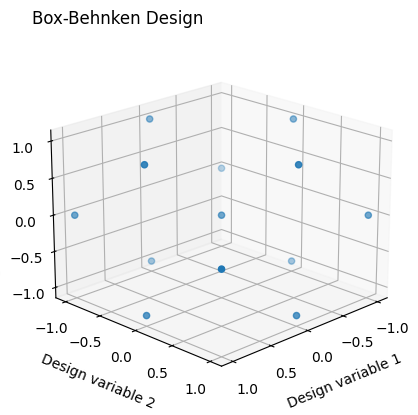

In [6]:
# ------ generate samples for 3 design variables from Box-Behnken design

# ------------ TODO: Enter your code here:

# ---- inputs
# number of centers to include
black = pyDOE2.bbdesign(3, center=1)
print(black.shape)
# ---- plot
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(black[:, 0], black[:, 1], black[:, 2])
ax2.view_init(elev=20, azim=45);
# ------------ End of code input

# -- labels
ax2.set_xlabel('Design variable 1', color=col, labelpad=8)
ax2.set_ylabel('Design variable 2',color=col, labelpad=8)
ax2.set_zlabel('Design variable 3', color=col, labelpad=5, rotation=90)

# boundaries of the design space
plt.title('Box-Behnken Design', loc='left', fontsize = 12, fontdict = {'fontsize': 
           12, 'verticalalignment': 'bottom','horizontalalignment': 'left'})        
       
plt.show()

## Monte Carlo Sampling

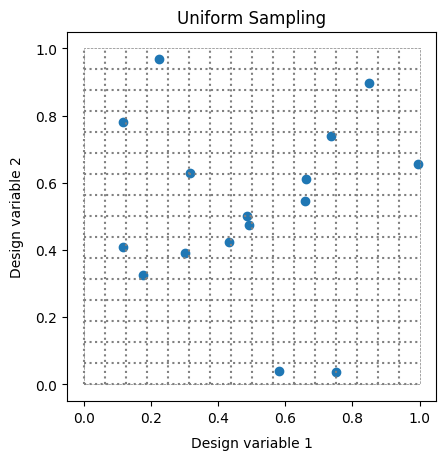

In [7]:
# ---------------- inputs      
num_dv = 2               # dimension
num_samp = 16          # No. of samples
num_sampf = float(num_samp) # turn integer to float to avoid getting zero in division  
# -------------------------- one plot
# by default, lower bound: 0, upper bound: 1

# import random
# np.random.seed(100)
DoE_Uni = np.random.rand(num_dv,num_samp).T 
# ---------------- plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(DoE_Uni[:,0],DoE_Uni[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
## --- grid lines
num_sampf = float(num_samp) # turn integer to float to avoid getting zero in devision    
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('Uniform Sampling', fontsize = 12)
plt.axis('square')
plt.show()

## Exercise 2: Box-Muller Algorithm

In this exercise you will implement a function which transforms two uniform independent distributed variables $(v_1,v_2)$ onto standard normal independently distributed variables $(x_1,x_2)$. One way to achieve this is the Box-Muller Algorithm (for more depth into the derivation, check this blog: https://math.stackexchange.com/questions/1110168/proof-of-the-box-muller-method or this document: https://math.nyu.edu/~goodman/teaching/MonteCarlo2005/notes/GaussianSampling.pdf). The basis of this algorithm is to implement the following transformation:

$$x_1=\sqrt{-2 \ln{v_1}} \cos{(2 \pi v_2)}$$
$$x_2=\sqrt{-2 \ln{v_1}} \sin{(2 \pi v_2)}$$

The signature of the function is shown in the following block:

In [8]:
# Definition of the Box-Muller Function
def box_muller(v:np.ndarray)->np.ndarray:

    """ 
    This function just receives a two dimensional array (preferably n x 2), where n is an arbitrary integer.
    """

    # The following lines are input checks
    if not isinstance(v,np.ndarray):
        raise ValueError("The input is not a Numpy array")

    if not len(v.shape)==2:
        raise ValueError("The dimension of the array must be at least of order 2")
    
    if not v.shape[1] ==2:
        # Transpose in this case
        v = v.T

    # ------------ TODO: Enter your code here:

    x = np.zeros_like(v)
    x[:, 0] = np.sqrt((-2)*np.log(v[:, 0]+1e-3)) * np.cos(2*np.pi*v[:, 1])
    x[:, 1] = np.sqrt((-2)*np.log(v[:, 0]+1e-3)) * np.sin(2*np.pi*v[:, 1])

    # ------------ End of Code Input:

    return x

Now, in the next block test the function with the points from the Monte-Carlo Samples `DoE_Uni` 

[[ 1.69325065e+00 -3.54805132e-01]
 [-5.09226888e-02 -7.48045779e-02]
 [-1.14389871e+00  6.07099743e-01]
 [ 1.00787201e+00  2.59195459e-01]
 [-5.20332193e-02 -7.76695447e-01]
 [-8.73760393e-01 -2.56391107e-01]
 [-6.94075901e-01 -5.80752150e-01]
 [-8.56368737e-01  1.64881475e+00]
 [-1.17730893e+00  1.80934052e-01]
 [ 7.36884771e-01  1.68026418e-01]
 [ 4.53422536e-01 -3.47850743e-01]
 [-1.18634000e+00  9.86671119e-01]
 [-1.05076052e+00 -1.09427482e+00]
 [ 3.88484803e-01 -2.02518104e+00]
 [-1.72333191e+00  1.13371590e+00]
 [-1.20053472e+00 -4.39179358e-05]]


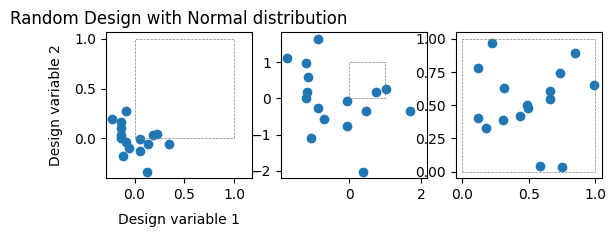





RAW DATA:

Original MCS DoE:
 [[0.22291423 0.96712617]
 [0.99491395 0.65487556]
 [0.4313425  0.42234397]
 [0.5808782  0.04006191]
 [0.73761266 0.73935363]
 [0.65960658 0.54542636]
 [0.66297737 0.61088927]
 [0.17699875 0.32624073]
 [0.49094089 0.47573025]
 [0.75055114 0.03568088]
 [0.84833969 0.89584938]
 [0.30308098 0.38958313]
 [0.31539384 0.62822818]
 [0.11829697 0.78016382]
 [0.11812376 0.40739048]
 [0.48543996 0.50000582]]

Normally distributed MCS DoE:
 [[ 1.69325065e+00 -3.54805132e-01]
 [-5.09226888e-02 -7.48045779e-02]
 [-1.14389871e+00  6.07099743e-01]
 [ 1.00787201e+00  2.59195459e-01]
 [-5.20332193e-02 -7.76695447e-01]
 [-8.73760393e-01 -2.56391107e-01]
 [-6.94075901e-01 -5.80752150e-01]
 [-8.56368737e-01  1.64881475e+00]
 [-1.17730893e+00  1.80934052e-01]
 [ 7.36884771e-01  1.68026418e-01]
 [ 4.53422536e-01 -3.47850743e-01]
 [-1.18634000e+00  9.86671119e-01]
 [-1.05076052e+00 -1.09427482e+00]
 [ 3.88484803e-01 -2.02518104e+00]
 [-1.72333191e+00  1.13371590e+00]
 [-1.200

In [9]:
# Get the transformed points
DoE_std = box_muller(DoE_Uni)
# --- Normalized Data
min_ = -3
max_ = 3
print(DoE_std)
DoE_std_normalized = np.array([(DoE_std[:,0]-np.mean(DoE_std[:,0]))/(max_-min_), (DoE_std[:,1]-np.mean(DoE_std[:,1]))/(max_-min_)]).T
# ---------------- plot

fig = plt.figure(1)
ax = fig.add_subplot(131)
ax.scatter(DoE_std_normalized[:,0],DoE_std_normalized[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('Random Design with Normal distribution', fontsize = 12)
plt.axis('square')


ax1 = fig.add_subplot(132)
ax1.scatter(DoE_std[:,0],DoE_std[:,1])
# --- boundaries of the design space
ax1.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# -- lables

plt.axis('square')

fig = plt.figure(1)
ax2 = fig.add_subplot(133)
ax2.scatter(DoE_Uni[:,0],DoE_Uni[:,1])
# --- boundaries of the design space
ax2.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# -- lables
plt.axis('square')
plt.show()

print('\n\n\n====================================\n')
print('RAW DATA:\n')
print('Original MCS DoE:\n', DoE_Uni)
print('\nNormally distributed MCS DoE:\n', DoE_std)
print('\nNormalized normally distributed MCS DoE:\n',DoE_std_normalized)

## Quasi-Monte Carlo Sampling (Sobol Sequences)
This section is relevant as you will experiment with an intermediate method between pure random sampling and stratified sampling (Latin-Hypercube Sampling is a special kind of stratified sampling by following the "sampling taxonomy"). Again, these Quasi-Monte Carlo samplers try to sample points from a multi-variate uniform distribution but with a more "space-filling" property (or technically speaking __low discrepancy__) to avoid gaps (which is normal in pure Random Sampling). Sobol and Halton sequences are examples of this kind of sampling and are constantly used as both samplers and for numerical integration of functions involving a policy in Gaussian Processes.

## Exercise 3: Sobol Sequences
For the following exercise, you will sample points from a Sobol sequence (from `scipy.stats.qmc.Sobol`). Check the signature of the function at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.Sobol.html and references therein. For your initial implementation do not allow the solution to be __scrambled__ (i.e. `scramble=False`) and do not allow optimization to check the raw output.

Additionally, for more information, check Chapter 5 from the book "Monte Carlo and Quasi-Monte Carlo Constructions" by Christiane Lemieux (you can download the book by using your LU-Account at https://link.springer.com/10.1007/978-0-387-78165-5) for a detailed explanation of how this method works. 

[[0.       0.      ]
 [0.5      0.5     ]
 [0.75     0.25    ]
 [0.25     0.75    ]
 [0.375    0.375   ]
 [0.875    0.875   ]
 [0.625    0.125   ]
 [0.125    0.625   ]
 [0.1875   0.3125  ]
 [0.6875   0.8125  ]
 [0.9375   0.0625  ]
 [0.4375   0.5625  ]
 [0.3125   0.1875  ]
 [0.8125   0.6875  ]
 [0.5625   0.4375  ]
 [0.0625   0.9375  ]
 [0.09375  0.46875 ]
 [0.59375  0.96875 ]
 [0.84375  0.21875 ]
 [0.34375  0.71875 ]
 [0.46875  0.09375 ]
 [0.96875  0.59375 ]
 [0.71875  0.34375 ]
 [0.21875  0.84375 ]
 [0.15625  0.15625 ]
 [0.65625  0.65625 ]
 [0.90625  0.40625 ]
 [0.40625  0.90625 ]
 [0.28125  0.28125 ]
 [0.78125  0.78125 ]
 [0.53125  0.03125 ]
 [0.03125  0.53125 ]
 [0.046875 0.265625]
 [0.546875 0.765625]
 [0.796875 0.015625]
 [0.296875 0.515625]
 [0.421875 0.140625]
 [0.921875 0.640625]
 [0.671875 0.390625]
 [0.171875 0.890625]
 [0.234375 0.078125]
 [0.734375 0.578125]
 [0.984375 0.328125]
 [0.484375 0.828125]
 [0.359375 0.453125]
 [0.859375 0.953125]
 [0.609375 0.203125]
 [0.109375 0.

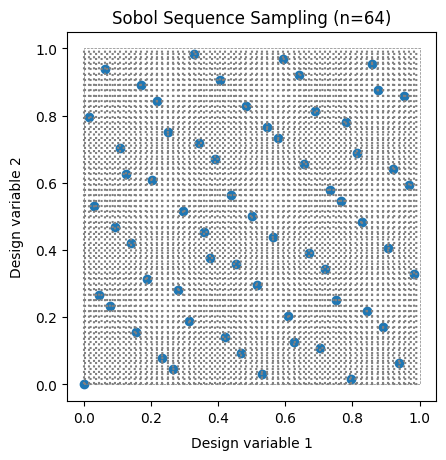

In [10]:
# ---------------- inputs      
num_dv = 2               # dimension
num_samp = 64            # No. of samples (This is an approximation as the number of points of a Sobol Sequence should be a "n=2^m" number)
num_sampf = float(num_samp) # turn integer to float to avoid getting zero in division  

# --------------------------- TODO: Implement the Sobol Sequence Sampler in this section (call the sequence of points as DoE_Sobol)
m = np.log2(num_sampf)
sampler = Sobol(d=num_dv, scramble=False)
DoE_Sobol = sampler.random_base2(m=int(m))
print(DoE_Sobol)

# ---------------------------- End of your Code input
# ---------------- plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(DoE_Sobol[:,0],DoE_Sobol[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# --- grid lines  
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')

# -- labels
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
plt.title(f'Sobol Sequence Sampling (n={DoE_Sobol.shape[0]})', fontsize = 12)
plt.axis('square')
plt.show()


Now, run the following block. The following block calls the `box_muller` function you implemented before to sample from the bivariate independent standard normal distribution.

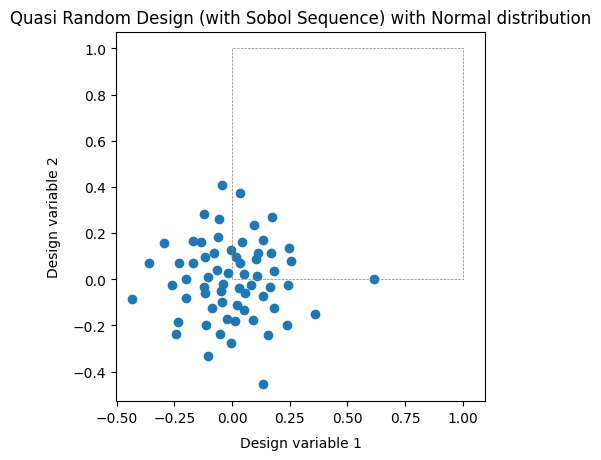





RAW DATA:

Original Sobol Sequence DoE:
 [[0.       0.      ]
 [0.5      0.5     ]
 [0.75     0.25    ]
 [0.25     0.75    ]
 [0.375    0.375   ]
 [0.875    0.875   ]
 [0.625    0.125   ]
 [0.125    0.625   ]
 [0.1875   0.3125  ]
 [0.6875   0.8125  ]
 [0.9375   0.0625  ]
 [0.4375   0.5625  ]
 [0.3125   0.1875  ]
 [0.8125   0.6875  ]
 [0.5625   0.4375  ]
 [0.0625   0.9375  ]
 [0.09375  0.46875 ]
 [0.59375  0.96875 ]
 [0.84375  0.21875 ]
 [0.34375  0.71875 ]
 [0.46875  0.09375 ]
 [0.96875  0.59375 ]
 [0.71875  0.34375 ]
 [0.21875  0.84375 ]
 [0.15625  0.15625 ]
 [0.65625  0.65625 ]
 [0.90625  0.40625 ]
 [0.40625  0.90625 ]
 [0.28125  0.28125 ]
 [0.78125  0.78125 ]
 [0.53125  0.03125 ]
 [0.03125  0.53125 ]
 [0.046875 0.265625]
 [0.546875 0.765625]
 [0.796875 0.015625]
 [0.296875 0.515625]
 [0.421875 0.140625]
 [0.921875 0.640625]
 [0.671875 0.390625]
 [0.171875 0.890625]
 [0.234375 0.078125]
 [0.734375 0.578125]
 [0.984375 0.328125]
 [0.484375 0.828125]
 [0.359375 0.453125]
 [0.859375

In [22]:
# Get the transformed points
DoE_std_Sobol = box_muller(DoE_Sobol)
# --- Normalized Data
min_ = -3
max_ = 3
DoE_std_Sobol_normalized = np.array([(DoE_std_Sobol[:,0]-np.mean(DoE_std_Sobol[:,0]))/(max_-min_), (DoE_std_Sobol[:,1]-np.mean(DoE_std_Sobol[:,1]))/(max_-min_)]).T

# ---------------- plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(DoE_std_Sobol_normalized[:,0],DoE_std_Sobol_normalized[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('Quasi Random Design (with Sobol Sequence) with Normal distribution', fontsize = 12)
plt.axis('square')
plt.show()

print('\n\n\n====================================\n')
print('RAW DATA:\n')
print('Original Sobol Sequence DoE:\n', DoE_Sobol)
print('\nNormally distributed Sobol Sequence DoE:\n', DoE_std_Sobol)
print('\nNormalized normally distributed Sobol Sequence DoE:\n',DoE_std_Sobol_normalized)

## Latin Hypercube Design
The following two blocks implements a Latin Hypercube Sampling from the `PyDOE` library. Just run the following two blocks and check the differences.

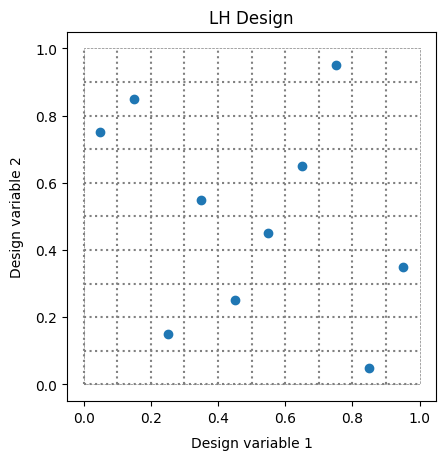

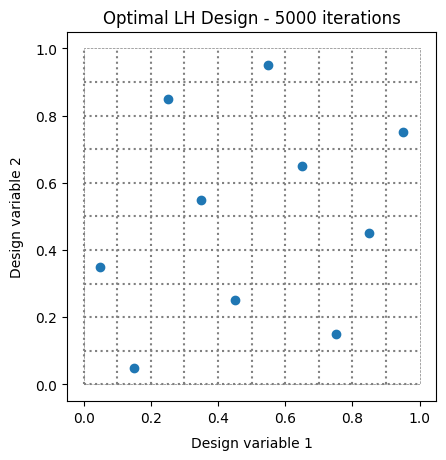

In [12]:
# ---------------- inputs      
num_dv = 2               # dimension
num_samp = 10           # No. of samples
num_iterations=5000     # number of iterations for improving LH

num_sampf = float(num_samp) # turn integer to float to avoid getting zero in division  

## -------------------------- Original LHS
## by default, lower bound: 0, upper bound: 1
DoE_LHS = pyDOE2.lhs(num_dv, num_samp,criterion = 'centermaximin') 
# ---------------- plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(DoE_LHS[:,0],DoE_LHS[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# --- grid lines  
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')

# -- labels
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('LH Design', fontsize = 12)
plt.axis('square')
plt.show()
#
# -------------------------- Optimal LHS                  
# by default, lower bound: 0, upper bound: 1
DoE_LHS_Opt = pyDOE2.lhs(num_dv, num_samp,criterion = 'centermaximin', iterations = num_iterations) 
# ---------------- plot
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.scatter(DoE_LHS_Opt[:,0],DoE_LHS_Opt[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# --- grid lines
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('Optimal LH Design - %d iterations'%num_iterations, fontsize = 12)
plt.axis('square')
plt.show()

## Exercise 4: Sample from normal cumulative distribution

The output design above scales all the variable ranges from zero to one which can then be transformed as the user wishes (like to a specific statistical distribution using the `scipy.stats.distributions ppf` (inverse cumulative distribution) function. This is common to do as the any uniformly distributed random variables could be transformed into other variables following arbitrary (continuous) distributions. The Box-Miller was an example of this, however you will use this in a more general setting.

Check the package and transform your sample with uniform distribution to a sample distributed according to a normal distribution (mean=0, standard deviation=1). Remember to normalize w.r.t. the total range of variation of the normal pdf, that we can consider to be [-3,3]. Plot the output.

Recall: To normalize the variable use this "formula":
$$X_{norm}=\frac{X-X_{max}}{X_{max}-X_{min}}$$

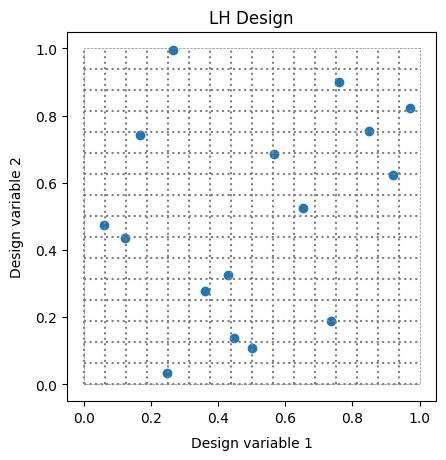

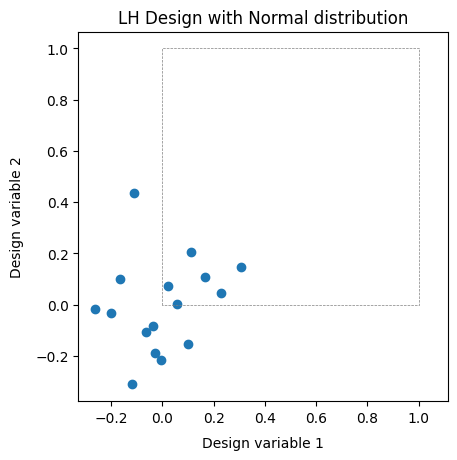





RAW DATA:

Original LHS DoE:
 [[0.85004642 0.75468429]
 [0.50056163 0.107176  ]
 [0.65225917 0.52416071]
 [0.2658114  0.99609822]
 [0.36121143 0.27717447]
 [0.24851715 0.03420202]
 [0.73664412 0.18788939]
 [0.42893708 0.32485532]
 [0.16860805 0.74164308]
 [0.44774014 0.13850559]
 [0.92083626 0.62229081]
 [0.76082284 0.90052774]
 [0.56526    0.68431108]
 [0.9704943  0.82299826]
 [0.06043936 0.47483337]
 [0.12329277 0.43646254]]

Normally distributed LHS DoE:
 [[ 1.03663250e+00  6.89304882e-01]
 [ 1.40780087e-03 -1.24168719e+00]
 [ 3.91426958e-01  6.05989752e-02]
 [-6.25530716e-01  2.66045342e+00]
 [-3.55222560e-01 -5.91255947e-01]
 [-6.79163444e-01 -1.82233592e+00]
 [ 6.33033523e-01 -8.85700791e-01]
 [-1.79080931e-01 -4.54164219e-01]
 [-9.59680375e-01  6.48419227e-01]
 [-1.31372957e-01 -1.08705798e+00]
 [ 1.41071902e+00  3.11502847e-01]
 [ 7.08951906e-01  1.28456448e+00]
 [ 1.64319041e-01  4.79788436e-01]
 [ 1.88810842e+00  9.26851817e-01]
 [-1.55109579e+00 -6.31252812e-02]
 [-1.158

In [23]:
# ---------------- inputs      
num_dv = 2               # dimension
num_samp = 16        # No. of samples
num_iterations=5000     # number of iterations for improving LH

num_sampf = float(num_samp) # turn integer to float to avoid getting zero in devision  

## -------------------------- Original LHS
## by default, lower bound: 0, upper bound: 1
DoE_LHS = pyDOE2.lhs(num_dv, num_samp, random_state = 4, iterations=num_iterations) 
# ---------------- plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(DoE_LHS[:,0],DoE_LHS[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# --- grid lines  
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')
# -- labels
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('LH Design', fontsize = 12)
plt.axis('square')
plt.show()


# ------------ TODO: Enter your code here:
import scipy
import scipy.stats
# --- Normalized Data
min_ = -3
max_ = 3
# Complete here
# Check the package and transform your 
# sample with uniform distribution to a sample distributed 
# according to a normal distribution (mean=0, standard deviation=1).
lhd = scipy.stats.distributions.norm(loc=0, scale=1).ppf(DoE_LHS)
lhd_normalized = np.array([(lhd[:, 0]-np.mean(lhd[:, 0]))/(max_-min_), (lhd[:, 1]-np.mean(lhd[:, 1]))/(max_-min_)]).T

# ------------- End of Code Input

# ---------------- plot
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(lhd_normalized[:,0],lhd_normalized[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# -- lables
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('LH Design with Normal distribution', fontsize = 12)
plt.axis('square')
plt.show()

print('\n\n\n====================================\n')
print('RAW DATA:\n')
print('Original LHS DoE:\n', DoE_LHS)
print('\nNormally distributed LHS DoE:\n', lhd)
print('\nNormalized normally distributed LHS DoE:\n', lhd_normalized)

#####


## Additional Ideas
1. Play around with the different approaches, e.g. compare MCS, QMC and LHS for different number of samples and function signatures (activate optimizers and change the number of iterations). 
2. Compare the output of the Standard Normal Transformation with the Latin Hypercube Sampling.
3. Look around if you can find libraries (or methods) for different approaches mentioned in the lectures and try to implement them here. Compare results in the end.
4. Try to implement approaches -- like the original LHS -- yourself. While it is a challenge, it should be possible with below 20 lines of code.

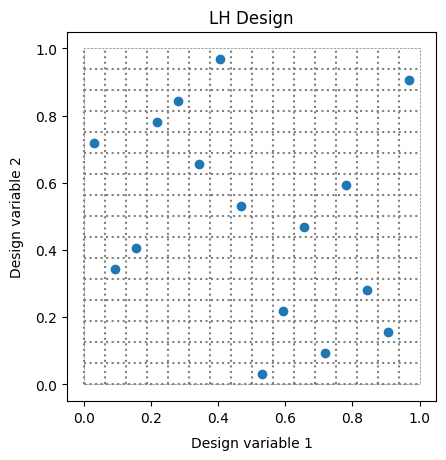

In [14]:
def LHS(samples, factors):
    midpoints = (np.arange(samples) + 0.5) / samples
    matrix = np.zeros((samples, factors))
    for j in range(factors):
        temp = np.random.permutation(midpoints)
        # Scale it to the actual bounds of the variable
        matrix[:, j] = temp
    return matrix
num_samp = 16
num_factor = 2
DoE_LHS = LHS(num_samp, num_factor)
num_sampf = float(num_samp)
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(DoE_LHS[:,0],DoE_LHS[:,1])
# --- boundaries of the design space
ax.plot([0,0,1,1,0],[0,1,1,0,0], color=[0.5,0.5,0.5], linestyle='--', linewidth = 0.5)
# --- grid lines  
for i in range(num_samp):
    ax.plot([0,1],[i/num_sampf,i/num_sampf],color=[0.5,0.5,0.5], linestyle=':')
    ax.plot([i/num_sampf,i/num_sampf],[0,1],color=[0.5,0.5,0.5], linestyle=':')
# -- labels
ax.set_xlabel('Design variable 1', color=col, labelpad=8)
ax.set_ylabel('Design variable 2',color=col, labelpad=8)
plt.title('LH Design', fontsize = 12)
plt.axis('square')
plt.show()


## Main and Interaction effects for a 2-level full factorial design

In [27]:
import pandas as pd
import numpy as np

results = [(-1, -1, -1, 674),
           ( 1, -1, -1, 3636),
           (-1,  1, -1, 170),
           ( 1,  1, -1, 1140),
           (-1, -1,  1, 292),
           ( 1, -1,  1, 2000),
           (-1,  1,  1, 90),
           (  1, 1,  1, 360)]

# --- Putting data into a pandas dataframe
results_df = pd.DataFrame(results,columns=['x1','x2','x3','y'])

# --- Conveniently scaling data by taking the logarithm base 10
results_df['logy'] = results_df['y'].map( lambda z : np.log10(z) )

# Set the indices
indices = ['0','A','B','AB','C','AC','BC','ABC']
results_df['indices'] = indices
results_df.set_index("indices", inplace=True)
# --- Visualization of the dataframe
results_df

,x1,x2,x3,y,logy
indices,,,,,
0,-1,-1,-1,674,2.828660
A,1,-1,-1,3636,3.560624
B,-1,1,-1,170,2.230449
AB,1,1,-1,1140,3.056905
C,-1,-1,1,292,2.465383
AC,1,-1,1,2000,3.301030
BC,-1,1,1,90,1.954243
ABC,1,1,1,360,2.556303


## Exercise 5: Main effect of each factor on the response

Now that we have our data, we can compute the main effect of each factor on the response (take logy as the response).

Remember that the main effect of a given variable is the average difference in the level of response as the input variable moves from the low to the high level. If there are other variables, the change in the level of response is averaged over all combinations of the other variables.

Suggestion: Use some shorthand Pandas functions to compute the averages -- It will make the task much faster! The `groupby` function is what you need. It groups rows of a dataframe according to some condition (in this case, the value of our variable of interest xi).

In [34]:
# Compute the mean effect of the factor on the response, conditioned on each variable
labels = ['x1','x2','x3']

# --- Initializing an empty set
main_effects = {}

# ------------ TODO: Enter your code here:
results_df = np.array(results_df)
for i in range(len(labels)):
    h = results_df[results_df[:, i]==1, 4].mean()
    l = results_df[results_df[:, i]==-1, 4].mean()
    main_effects[labels[i]] = (h-l)# *2/len(results_df)


print(main_effects)
# ------------ TODO: End of code input

{'x1': 0.7490317608790833, 'x2': -0.5894494588190722, 'x3': -0.3499199216202462}


## Additional Idea
It is a bit tougher but not impossible: you could try to compute the two-way and three-way interaction effects.

In [36]:
results = [(-1, -1, -1, 1, 1, 1, -1, 674),
           ( 1, -1, -1, -1, -1, 1, 1, 3636),
           (-1,  1, -1, -1, 1, -1, 1, 170),
           ( 1,  1, -1, 1, -1, -1, -1, 1140),
           (-1, -1,  1, 1, -1, -1, 1, 292),
           ( 1, -1,  1, -1, 1, -1, -1, 2000),
           (-1,  1,  1, -1, -1, 1, -1, 90),
           ( 1,  1,  1, 1, 1, 1, 1, 360)]
results_df = pd.DataFrame(results,columns=['x1','x2','x3','x1x2',
                                           'x1x3', 'x2x3', 'x1x2x3','y'])

# --- Conveniently scaling data by taking the logarithm base 10
results_df['logy'] = results_df['y'].map( lambda z : np.log10(z) )

# Set the indices
indices = ['0','A','B','AB','C','AC','BC','ABC']
results_df['indices'] = indices
results_df.set_index("indices", inplace=True)
# --- Visualization of the dataframe
results_df

,x1,x2,x3,x1x2,x1x3,x2x3,x1x2x3,y,logy
indices,,,,,,,,,
0,-1,-1,-1,1,1,1,-1,674,2.828660
A,1,-1,-1,-1,-1,1,1,3636,3.560624
B,-1,1,-1,-1,1,-1,1,170,2.230449
AB,1,1,-1,1,-1,-1,-1,1140,3.056905
C,-1,-1,1,1,-1,-1,1,292,2.465383
AC,1,-1,1,-1,1,-1,-1,2000,3.301030
BC,-1,1,1,-1,-1,1,-1,90,1.954243
ABC,1,1,1,1,1,1,1,360,2.556303


In [37]:
# Compute the mean effect of the factor on the response, conditioned on each variable
labels = ['x1x2','x1x3','x2x3']

# --- Initializing an empty set
main_effects = {}

# ------------ TODO: Enter your code here:
results_df = np.array(results_df)
m = len(labels)
for i in range(len(labels)):
    h = results_df[results_df[:, m+i]==1, -1].mean()
    l = results_df[results_df[:, m+i]==-1, -1].mean()
    main_effects[labels[i]] = (h-l)# *2/len(results_df)
print(main_effects)

{'x1x2': -0.03477380023600318, 'x1x3': -0.03017819310732106, 'x2x3': -0.03848445963382119}


In [39]:

h = results_df[results_df[:, 6]==1, -1].mean()
l = results_df[results_df[:, 6]==-1, -1].mean()
print((h-l))# *2/len(results_df))

-0.08201977620779743
